Plots refinement.

Copyright: 2022, Mitja Jančič for Jozef Stefan Institute

# Import libs

In [1]:
import numpy as np
import h5py as h5
import matplotlib.pyplot as plt
from numpy import true_divide
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib
import glob

In [2]:
from matplotlib import interactive

interactive(True)
%matplotlib qt

In [2]:
plt.rcParams.update({
    "mathtext.fontset": "cm",
    "font.family": "STIXGeneral",
    "text.usetex": False,
    "axes.formatter.use_mathtext": True,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "axes.labelsize": 14
})


# Import data

In [3]:
source_file = '../data/refine.h5'

# Plot domain

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = '../data/refine.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

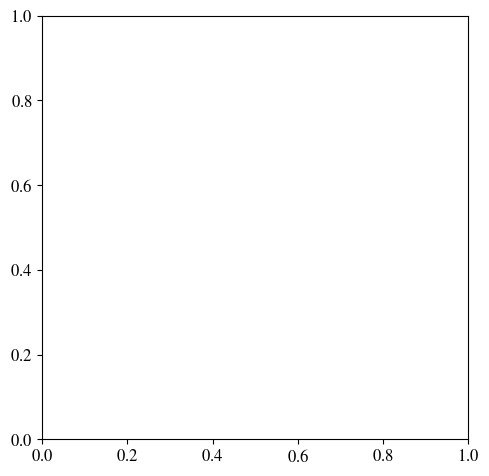

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(5.5, 5.5))


data = h5.File(source_file, 'r')

# Get groups.
groups = list(data.keys())
positions = data['domain']['pos'][:]
types = data['domain']['types'][:]
supports = data['supports'][:]

ax.scatter(positions[0], positions[1], s=5,label='interior')
ax.scatter(positions[0][types == -5], positions[1][types == -5], s=5, color='lime', label = r'envelope boundary, $\Gamma _e$')
ax.scatter(positions[0][types == -1], positions[1][types == -1], s=10, color='tab:red', label = r'liquid boundary, $\Gamma _\ell$')

# Supports
support_idexes = [2231, 79, 290]
for i, support_id in enumerate(support_idexes):
    x = positions[0][supports[:, support_id]]
    y = positions[1][supports[:, support_id]]
    ax.scatter(x, y, s = 80, facecolors='none', edgecolors='k', label= None if i > 0 else 'stencil nodes')
    ax.scatter(x[0], y[0], marker='x', s=60, color='k', label = None if i > 0 else 'central node' )

legend = ax.legend(framealpha=1, loc='lower left')
frame = legend.get_frame()
frame.set_facecolor('white')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_aspect('equal')
# ax.set_xlim(left=-3.1)
# ax.set_ylim(bottom=-3.1)
# Close file.
data.close()


# inset axes....
axins = ax.inset_axes([0.03, 0.66, 0.32, 0.32])
axins.scatter(positions[0], positions[1], s=5,label='interior')
axins.scatter(positions[0][types == -5], positions[1][types == -5], s=5, color='lime', label = r'envelope boundary, $\Gamma _e$')
axins.scatter(positions[0][types == -1], positions[1][types == -1], s=10, color='tab:red', label = r'liquid boundary, $\Gamma _\ell$')
# Supports
support_idexes = [2231, 79, 290]
for i, support_id in enumerate(support_idexes):
    x = positions[0][supports[:, support_id]]
    y = positions[1][supports[:, support_id]]
    axins.scatter(x, y, s = 80, facecolors='none', edgecolors='k', label= None if i > 0 else 'stencil nodes')
    axins.scatter(x[0], y[0], marker='x', s=60, color='k', label = None if i > 0 else 'central node' )
# # sub region of the original image
x1, x2, y1, y2 = 0.35, 0.74, 0.78, 1.17
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticklabels([])
axins.set_yticklabels([])

ax.indicate_inset_zoom(axins, edgecolor="black")


fig.tight_layout()

if 0:
    fig.savefig('../manuscript/paper/figures/domain_discretization.eps', dpi=300, transparent=False, bbox_inches='tight')